In [1]:
import random, glob
import numpy as np

In [2]:
music_files = [a for a in glob.glob("dataset/*/*")]
print("A random song", random.sample(music_files, 1))

A random song ['dataset\\muss\\muss_5.mid']


In [3]:
from music21 import midi
def play_midi_file(midi_file_name):
    mf = midi.MidiFile()

    mf.open(midi_file_name) # path='abc.midi'
    mf.read()
    mf.close()
    s = midi.translate.midiFileToStream(mf)
    s.show('midi')

In [4]:
len(music_files)

300

In [5]:
from music21 import converter,corpus, chord

In [6]:
def get_score(music_files):
    chords = []
    for file_no, filename in enumerate(music_files):
        try:
            chords.append(converter.parse(filename))
            print(f'Happening of {file_no}', "filename = ", filename)
            
        except:
            print(f'Happening of {file_no}', "filename = ", filename)
            print("file failed!!!!!")
            continue
        
    
    return chords

In [7]:
music_files_5 = music_files[:25]
#get_chords(music_files[:10])

In [8]:
score_of_all_musics = get_score(music_files_5)

Happening of 0 filename =  dataset\albeniz\alb_esp1.mid
Happening of 1 filename =  dataset\albeniz\alb_esp1.song
file failed!!!!!
Happening of 2 filename =  dataset\albeniz\alb_esp2.mid
Happening of 3 filename =  dataset\albeniz\alb_esp3.mid
Happening of 4 filename =  dataset\albeniz\alb_esp4.mid
Happening of 5 filename =  dataset\albeniz\alb_esp5.mid
Happening of 6 filename =  dataset\albeniz\alb_esp6.mid
Happening of 7 filename =  dataset\albeniz\alb_se1.mid
Happening of 8 filename =  dataset\albeniz\alb_se2.mid
Happening of 9 filename =  dataset\albeniz\alb_se3.mid
Happening of 10 filename =  dataset\albeniz\alb_se4.mid
Happening of 11 filename =  dataset\albeniz\alb_se5.mid
Happening of 12 filename =  dataset\albeniz\alb_se6.mid
Happening of 13 filename =  dataset\albeniz\alb_se7.mid
Happening of 14 filename =  dataset\albeniz\alb_se8.mid
Happening of 15 filename =  dataset\bach\bach_846.mid
Happening of 16 filename =  dataset\bach\bach_847.mid
Happening of 17 filename =  dataset\b

In [9]:
score_of_all_musics

[<music21.stream.Score 0x22353d5b940>,
 <music21.stream.Score 0x22350fcba60>,
 <music21.stream.Score 0x2235454da00>,
 <music21.stream.Score 0x2235506f160>,
 <music21.stream.Score 0x22356d55dc0>,
 <music21.stream.Score 0x22356fddc10>,
 <music21.stream.Score 0x2235799e9d0>,
 <music21.stream.Score 0x223598938b0>,
 <music21.stream.Score 0x2235a123d60>,
 <music21.stream.Score 0x2235c5111f0>,
 <music21.stream.Score 0x22357bff130>,
 <music21.stream.Score 0x2235f3c36d0>,
 <music21.stream.Score 0x2235f3db700>,
 <music21.stream.Score 0x2235d90a910>,
 <music21.stream.Score 0x22362a64f40>,
 <music21.stream.Score 0x22364873b50>,
 <music21.stream.Score 0x22365640c40>,
 <music21.stream.Score 0x223675247c0>,
 <music21.stream.Score 0x2236e03ae20>,
 <music21.stream.Score 0x22371ca2880>,
 <music21.stream.Score 0x22371d63580>,
 <music21.stream.Score 0x22371d50e20>,
 <music21.stream.Score 0x22379888490>,
 <music21.stream.Score 0x2237a8e7400>]

In [10]:
from music21 import chord, duration

Classifying the music into different modes
- firstly, let's code for major mode

In [11]:
from music21 import *

In [12]:
def round_chord_durations(number):
    if(number>1.25):
        return 2
    if(number>.30):
        return 1.25
    if(number>.10):
        return 0.3
    return 0.1

In [13]:
def round_tempo(number):
    if(number>=20 and number<40):
        return 30
    if(number>=40 and number<60):
        return 50
    if(number>=60 and number<76):
        return 70
    if(number>=76 and number<108):
        return 92
    if(number>=108 and number<120):
        return 104
    if(number>=120 and number<168):
        return 144
    if(number>=168 and number<200):
        return 184
    if(number>=200):
        return 210

For chord and duration of a single song(music file)

In [216]:
def get_chord_and_duration_data(individual_score):
    no_of_tracks = len(individual_score.parts)
    flags=[0,0,0]
    chord_duration_data = []
    note_and_chord_sequence =[]
    
    note_and_chord_duration =[]   ## not for now:
    all_tempo= []
    
    #to see the number of tracks:
    #print(len(individual_score.parts))
    
    for element in individual_score.flat:
        #print("element = ", element, type(element))
        
        
        if isinstance(element, chord.Chord):
            flags[0] = flags[0] + 1
            if (flags[0] == 1):
                note_and_chord_sequence.append('<SOC>') ## Start of Chord
                [note_and_chord_sequence.append(pitch.nameWithOctave) for pitch in element.pitches]
                note_and_chord_sequence.append('<EOC>') ## End of Chord

                chord_duration =str(round_chord_durations(element.duration.quarterLength))
                #print (type(element.duration.quarterLength))
                note_and_chord_sequence.append(chord_duration)
                #print(((pitch.nameWithOctave) for pitch in element.pitches), chord_duration)
            elif (flags[0] == no_of_tracks):
                flags[0] =0
            
            
            
            
        elif isinstance(element, note.Note):
            flags[1] = flags[1] + 1
            if (flags[1] == 1):
                [note_and_chord_sequence.append(pitch.nameWithOctave) for pitch in element.pitches]

                note_duration = str(round_chord_durations(element.duration.quarterLength))
                note_and_chord_sequence.append(note_duration)
                #print(((pitch.nameWithOctave) for pitch in element.pitches), note_duration)
            elif (flags[1] == no_of_tracks):
                flags[1] =0
        
        
        elif isinstance(element, note.Rest):
            rest_note_name = element.name
            #print(rest_note_name)
            
            
        elif isinstance(element, tempo.MetronomeMark):
            flags[2] = flags[2] + 1
            if (flags[2] == 1):
                tempo_bpm = element.getQuarterBPM()
                #note_and_chord_sequence.append(str(round_tempo(tempo_bpm)))
                all_tempo.append(tempo_bpm)
                #print(tempo_bpm)
            elif (flags[2] == no_of_tracks):
                flags[2] =0
       
            
    
    #print("tempo ko lagi = " ,np.quantile(all_tempo, .25), np.quantile(all_tempo, .50), np.quantile(all_tempo, .75) )
    #print("tempo ko lagi max min = " ,np.max(all_tempo) , np.min(all_tempo)  )
    #print(note_and_chord_sequence)
    return note_and_chord_sequence

In [217]:
#get_chord_and_duration_data(score_of_all_musics[0])

In [218]:
chords_and_duration_data_all_music= []
for one_score in score_of_all_musics:
   chords_and_duration_data_all_music.append((get_chord_and_duration_data(one_score)))

In [219]:
# this is the main data:
len(chords_and_duration_data_all_music)
#np.asarray(chords_and_duration_data_all_music).shape

24

In [220]:
chords_and_duration_data_all_music[0]

['A5',
 '1.25',
 'E6',
 '2',
 'E6',
 '1.25',
 '<SOC>',
 'D6',
 'E6',
 '<EOC>',
 '0.3',
 'D6',
 '1.25',
 'C6',
 '1.25',
 'D6',
 '1.25',
 'E6',
 '1.25',
 'F6',
 '1.25',
 'G6',
 '1.25',
 'E6',
 '1.25',
 'F6',
 '1.25',
 'E6',
 '0.3',
 '<SOC>',
 'D6',
 'E6',
 '<EOC>',
 '0.3',
 'D6',
 '1.25',
 'C6',
 '1.25',
 'B-5',
 '1.25',
 'A2',
 '1.25',
 'E3',
 '1.25',
 'A3',
 '1.25',
 'C#4',
 '1.25',
 'E4',
 '1.25',
 'A4',
 '1.25',
 'C#5',
 '1.25',
 'C#4',
 '1.25',
 'E4',
 '1.25',
 'A4',
 '1.25',
 'C#5',
 '1.25',
 'E5',
 '1.25',
 'A5',
 '1.25',
 'E5',
 '1.25',
 'C#5',
 '1.25',
 'A4',
 '1.25',
 'E4',
 '1.25',
 'C#4',
 '1.25',
 'A4',
 '1.25',
 'E4',
 '1.25',
 'C#4',
 '1.25',
 'A3',
 '1.25',
 'A3',
 '1.25',
 'E3',
 '1.25',
 'A5',
 '1.25',
 'E6',
 '2',
 'E6',
 '1.25',
 '<SOC>',
 'D6',
 'E6',
 '<EOC>',
 '0.3',
 'D6',
 '1.25',
 'C6',
 '1.25',
 'D6',
 '1.25',
 'E6',
 '1.25',
 'F6',
 '1.25',
 'G6',
 '1.25',
 'E6',
 '1.25',
 'F6',
 '1.25',
 'E6',
 '0.3',
 '<SOC>',
 'D6',
 'E6',
 '<EOC>',
 '0.3',
 'D6',
 '1.25',


In [221]:
print("Generating music from our processed chords...")
proccessed_chords_to_midi_sample = get_music_midi_filename_from_chords(chords_and_duration_data_all_music[0][4:50])
print(proccessed_chords_to_midi_sample)
play_midi_file(proccessed_chords_to_midi_sample)

Generating music from our processed chords...


NameError: name 'get_music_midi_filename_from_chords' is not defined

from Tonic_mode_all, separating major and minor songs 

In [ ]:
tonic_mode_all[0][0], tonic_mode_all[0][-1]

In [222]:
all_major_songs_chords_and_duration = []
all_minor_songs_chords_and_duration = []
for i in range(len(tonic_mode_all)):
    if(tonic_mode_all[i][-1] == 'major'):
        try:
            all_major_songs_chords_and_duration.append(chords_and_duration_data_all_music[i])
        except:
            all_major_songs_chords_and_duration.append('NANNNNNN')
    else:
        try:
            all_minor_songs_chords_and_duration.append(chords_and_duration_data_all_music[i])
        except:
             all_minor_songs_chords_and_duration.append('NANNNNNN')

NameError: name 'tonic_mode_all' is not defined

In [223]:
len(all_minor_songs_chords_and_duration), #minor_songs_chords_with_duration, len(minor_songs_chords_with_duration)

(0,)

In [224]:
major_dataset = all_major_songs_chords_and_duration 
minor_dataset = all_minor_songs_chords_and_duration

In [225]:
#just a reference code
#major_dataset
#y=np.array(major_dataset)
#unique = set(major_dataset_all)
#unique2 = set(minor_dataset_all)

In [226]:
chords_and_duration_data_all_music[0][0]

'A5'

In [227]:
main_dataset = chords_and_duration_data_all_music

In [228]:
len(main_dataset)

24

* Data preparation stage

In [229]:
#  !jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [230]:
no_of_timesteps = 32
x = []
y = []

## CD stands for chord and duration.

for each_music_with_CD in main_dataset:
    for each_CD in range(0, len(each_music_with_CD) - no_of_timesteps,  1):
        
        ## preparing input and output sequences:
        input_ = each_music_with_CD[each_CD:each_CD + no_of_timesteps]
        output = each_music_with_CD[each_CD + no_of_timesteps]
        #print(input_)
        
       
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [231]:
x.shape

(71552, 32)

In [232]:
#assigning unique integer to every chords_and_duration

unique_x_CD = list(set(np.concatenate(x)))
unique_x_CD_to_int = dict((chord_and_duration, number) for number, chord_and_duration in enumerate(unique_x_CD))
unique_x_CD_to_int

{'E4': 0,
 'D5': 1,
 'F#1': 2,
 'D2': 3,
 'E7': 4,
 'B-5': 5,
 'C#4': 6,
 'C#7': 7,
 'E-4': 8,
 'E-1': 9,
 '2': 10,
 'E-7': 11,
 'E6': 12,
 'F5': 13,
 'F3': 14,
 'B2': 15,
 'G#2': 16,
 'C6': 17,
 'G6': 18,
 '<SOC>': 19,
 'G2': 20,
 'B-1': 21,
 'F7': 22,
 'G#6': 23,
 'F#7': 24,
 'G1': 25,
 'E3': 26,
 'A4': 27,
 'C#6': 28,
 'A3': 29,
 'E-6': 30,
 'E2': 31,
 'G3': 32,
 'C#1': 33,
 'C4': 34,
 'F#2': 35,
 'E-2': 36,
 'G#7': 37,
 'B-3': 38,
 'D6': 39,
 'B-4': 40,
 '0.3': 41,
 'F4': 42,
 'B1': 43,
 'D1': 44,
 'F#3': 45,
 'G4': 46,
 'F#5': 47,
 'G#1': 48,
 '<EOC>': 49,
 'E5': 50,
 'B6': 51,
 '0.1': 52,
 'A6': 53,
 'C#3': 54,
 'A2': 55,
 'G#4': 56,
 'C2': 57,
 'B5': 58,
 'C5': 59,
 'A5': 60,
 'F1': 61,
 'B3': 62,
 'F2': 63,
 'G5': 64,
 'A7': 65,
 'F6': 66,
 'A1': 67,
 'C3': 68,
 'C#5': 69,
 'C7': 70,
 'G#5': 71,
 'F#4': 72,
 'C#2': 73,
 'B-2': 74,
 'E-3': 75,
 '1.25': 76,
 'E1': 77,
 'G#3': 78,
 'D3': 79,
 'B4': 80,
 'E-5': 81,
 'D7': 82,
 'D4': 83,
 'B-6': 84,
 'F#6': 85}

In [233]:
#preparing input sequences::

x_seq=[]
for each_row in x:
    temp=[]
    for each_piece in each_row:
        #assigning unique integer to every note
        temp.append(unique_x_CD_to_int[each_piece])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)
x_seq.shape

(71552, 32)

In [234]:
# preparing th output sequences as well::

unique_y_CD = list(set(y))
unique_y_CD_to_int = dict((chord_and_duration, number) for number, chord_and_duration in enumerate(unique_y_CD)) 
unique_y_CD_to_int

{'E4': 0,
 'D5': 1,
 'F#1': 2,
 'D2': 3,
 'E7': 4,
 'B-5': 5,
 'C#4': 6,
 'C#7': 7,
 'E-4': 8,
 'E-1': 9,
 '2': 10,
 'E-7': 11,
 'E6': 12,
 'F5': 13,
 'F3': 14,
 'B2': 15,
 'G#2': 16,
 'C6': 17,
 'G6': 18,
 '<SOC>': 19,
 'G2': 20,
 'B-1': 21,
 'F7': 22,
 'G#6': 23,
 'F#7': 24,
 'G1': 25,
 'E3': 26,
 'A4': 27,
 'C#6': 28,
 'A3': 29,
 'E-6': 30,
 'E2': 31,
 'G3': 32,
 'C#1': 33,
 'C4': 34,
 'F#2': 35,
 'E-2': 36,
 'G#7': 37,
 'B-3': 38,
 'D6': 39,
 'B-4': 40,
 '0.3': 41,
 'F4': 42,
 'B1': 43,
 'D1': 44,
 'F#3': 45,
 'G4': 46,
 'F#5': 47,
 'G#1': 48,
 '<EOC>': 49,
 'E5': 50,
 'B6': 51,
 '0.1': 52,
 'A6': 53,
 'C#3': 54,
 'A2': 55,
 'G#4': 56,
 'C2': 57,
 'B5': 58,
 'C5': 59,
 'A5': 60,
 'F1': 61,
 'B3': 62,
 'F2': 63,
 'G5': 64,
 'A7': 65,
 'F6': 66,
 'A1': 67,
 'C3': 68,
 'C#5': 69,
 'C7': 70,
 'G#5': 71,
 'F#4': 72,
 'C#2': 73,
 'B-2': 74,
 'E-3': 75,
 '1.25': 76,
 'E1': 77,
 'G#3': 78,
 'D3': 79,
 'B4': 80,
 'E-5': 81,
 'D7': 82,
 'D4': 83,
 'B-6': 84,
 'F#6': 85}

In [235]:
y_seq=np.array([unique_y_CD_to_int[i] for i in y])
y_seq.shape

(71552,)

In [236]:
# preserving 80% of the data for training and the rest 20% for the evaluation:

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [237]:
len(x_train)

57241

In [238]:
x_train.shape

(57241, 32)

# model building phase:

In [239]:
import tensorflow as tf

In [240]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [241]:
tf.__version__

'2.11.0'

In [242]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K
from tensorflow import keras

K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x_CD), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y_CD), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 100)           8600      
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            19264     
                                                                 
 dropout (Dropout)           (None, 32, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 dropout_1 (Dropout)         (None, 16, 128)           0         
                                                        

In [243]:
def lstm():
    K.clear_session()
    model = Sequential()
    #embedding layer
    model.add(Input(shape= (None,)))
    model.add(Embedding(len(unique_x_CD), 100,trainable=True)) 
    
    model.add(LSTM(128, return_sequences =True))
    model.add(LSTM(64, return_sequences =True))
    
    
    
    model.add(LSTM(32))
    model.add(Dropout(0.2))
    
    model.add(Dense(64))
    model.add(Activation('relu'))

    model.add(Dense(len(unique_y_CD), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model

In [244]:
model = lstm()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         8600      
                                                                 
 lstm (LSTM)                 (None, None, 128)         117248    
                                                                 
 lstm_1 (LSTM)               (None, None, 64)          49408     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 activation (Activation)     (None, 64)                0

In [245]:
!pip install pydot

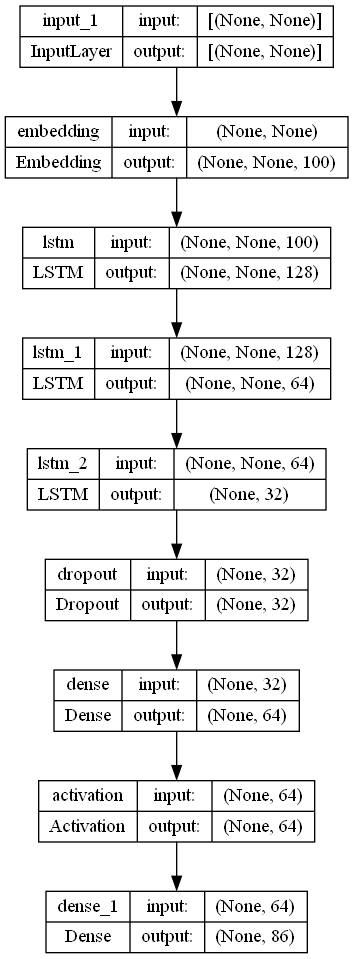

In [246]:
keras.utils.plot_model(model, "my_first_model_without_tempo.png", show_shapes=True)

In [129]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
#[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, None) <dtype: 'float32'>
(None, 95) <dtype: 'float32'>


[None]

In [130]:
!pip install h5py

In [131]:
import h5py

In [247]:
#defining call back to save the best model during training>
mc1 = ModelCheckpoint('models/best_model_25_songs_without_tempo_abit_more_complex.h5', monitor='val_accuracy', mode='min', save_best_only=False,verbose=1, metrics=[tf.keras.metrics.Accuracy()])

In [248]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [249]:
num_words= 71
#x_train = np.random.randint(num_words, size=(6771, 10))
padded_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    x_train, padding="post"
)
padded_inputs_val = tf.keras.preprocessing.sequence.pad_sequences(
    x_val, padding="post"
)

In [250]:
len(padded_inputs[0])

32

In [251]:
len(padded_inputs_val[0])

32

In [252]:
#actual training
history = model.fit(np.array(x_train),np.array(y_train),batch_size=128,epochs=50, 
                   validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc1])

Epoch 1/50
448/448 [==============================] - ETA: 0s - loss: 3.1033 - accuracy: 0.2670
Epoch 1: saving model to models\best_model_25_songs_without_tempo_abit_more_complex.h5
448/448 [==============================] - 682s 2s/step - loss: 3.1033 - accuracy: 0.2670 - val_loss: 2.4433 - val_accuracy: 0.4128
Epoch 2/50
448/448 [==============================] - ETA: 0s - loss: 2.4276 - accuracy: 0.4132
Epoch 2: saving model to models\best_model_25_songs_without_tempo_abit_more_complex.h5
448/448 [==============================] - 670s 1s/step - loss: 2.4276 - accuracy: 0.4132 - val_loss: 2.3776 - val_accuracy: 0.4207
Epoch 3/50
448/448 [==============================] - ETA: 0s - loss: 2.3923 - accuracy: 0.4154
Epoch 3: saving model to models\best_model_25_songs_without_tempo_abit_more_complex.h5
448/448 [==============================] - 584s 1s/step - loss: 2.3923 - accuracy: 0.4154 - val_loss: 2.3511 - val_accuracy: 0.4195
Epoch 4/50
448/448 [==============================] - E

Epoch 27/50
448/448 [==============================] - ETA: 0s - loss: 1.9627 - accuracy: 0.4915
Epoch 27: saving model to models\best_model_25_songs_without_tempo_abit_more_complex.h5
448/448 [==============================] - 790s 2s/step - loss: 1.9627 - accuracy: 0.4915 - val_loss: 1.9820 - val_accuracy: 0.4891
Epoch 28/50
448/448 [==============================] - ETA: 0s - loss: 1.9546 - accuracy: 0.4918
Epoch 28: saving model to models\best_model_25_songs_without_tempo_abit_more_complex.h5
448/448 [==============================] - 751s 2s/step - loss: 1.9546 - accuracy: 0.4918 - val_loss: 1.9829 - val_accuracy: 0.4886
Epoch 29/50
448/448 [==============================] - ETA: 0s - loss: 1.9451 - accuracy: 0.4949
Epoch 29: saving model to models\best_model_25_songs_without_tempo_abit_more_complex.h5
448/448 [==============================] - 1203s 3s/step - loss: 1.9451 - accuracy: 0.4949 - val_loss: 1.9821 - val_accuracy: 0.4838
Epoch 30/50
448/448 [===========================

In [253]:
# Print accuracy and loss for each epoch
print(history_callback.history['accuracy'])
print(history_callback.history['val_accuracy'])

[0.32026588916778564, 0.45375725626945496]
[0.4458414912223816, 0.4790270924568176]


In [254]:
# Print accuracy and loss for each epoch
history.history['accuracy']

[0.2669764757156372,
 0.413200318813324,
 0.4154190123081207,
 0.4163624048233032,
 0.41714856028556824,
 0.43872398138046265,
 0.4571548402309418,
 0.4635837972164154,
 0.46489405632019043,
 0.4651910364627838,
 0.467916339635849,
 0.46945372223854065,
 0.4717073440551758,
 0.47137540578842163,
 0.4734193980693817,
 0.4753411114215851,
 0.4746423065662384,
 0.4777694344520569,
 0.47918450832366943,
 0.48012787103652954,
 0.48107126355171204,
 0.4835869371891022,
 0.4858230948448181,
 0.4867839515209198,
 0.4882863759994507,
 0.48996350169181824,
 0.4915357828140259,
 0.4918152987957001,
 0.49492496252059937,
 0.495676189661026,
 0.4960605204105377,
 0.4968990683555603,
 0.49883824586868286,
 0.5015111565589905,
 0.5025418996810913,
 0.5032930970191956,
 0.5047780275344849,
 0.5079401135444641,
 0.5106828808784485,
 0.5117835402488708,
 0.5136877298355103,
 0.514508843421936,
 0.517531156539917,
 0.5184046626091003,
 0.5200468301773071,
 0.5240474343299866,
 0.5235757827758789,
 0.5270

In [215]:
#loading best model (Previously trained modle)
from keras.models import load_model
model = load_model('models/best_model_25_songs_with_tempo_abit_more_complex.h5')


In [255]:
random_music = x_train[41]

In [256]:
random_music = random_music.reshape(1, 32 )
random_music

array([[59, 49, 41, 47, 41, 19, 50, 13, 49, 41, 19, 17, 60, 49, 41, 60,
        41, 19,  5, 64, 49, 41, 13, 41, 19, 64, 81, 49, 41, 69, 41, 19]])

In [153]:
prob1 = model.predict(random_music)[0]
prob1

1/1 [==============================] - 0s 273ms/step


array([5.50807035e-03, 9.07226536e-07, 8.96424081e-06, 2.81337975e-07,
       1.27916081e-07, 3.59878197e-13, 4.92558971e-09, 4.21351469e-05,
       6.98137312e-11, 9.50541437e-01, 1.98321068e-05, 1.20608601e-11,
       2.14698121e-20, 0.00000000e+00, 4.80247654e-05, 8.00883448e-09,
       2.64960977e-06, 2.31160047e-05, 4.21514216e-07, 1.29993990e-04,
       5.50537536e-08, 1.46249288e-08, 1.14250537e-02, 3.18370212e-07,
       2.42913870e-07, 8.93459568e-14, 9.20599569e-11, 3.46177297e-13,
       3.85172484e-07, 2.70361483e-07, 1.54966037e-05, 5.73872994e-09,
       3.22076703e-05, 1.84744238e-08, 1.78431742e-10, 1.41693067e-06,
       6.91381217e-07, 3.06123268e-21, 9.89911678e-06, 4.93491189e-06,
       1.47208738e-07, 4.51687841e-14, 1.08764908e-09, 1.41299506e-05,
       5.74006869e-08, 2.83347322e-06, 5.58572411e-10, 8.23996288e-06,
       1.40615457e-08, 3.80256475e-28, 7.56667589e-07, 7.43270084e-06,
       1.64580138e-06, 3.47848754e-08, 2.34455424e-11, 2.94210076e-06,
      

In [154]:
y_pred1= np.argmax(prob1,axis=0)
y_pred1

9

In [197]:
import numpy as np
import random
ind = np.random.randint(0,len(x_val)-1)
random_music = x_train[ind]
random_music

array([54, 46, 67, 67, 67, 22, 19, 61, 54, 46, 67, 67, 67, 92, 46, 67, 67,
       22, 51, 10, 54, 46, 67, 67, 22, 47, 92, 54, 46, 42, 42, 83])

In [257]:
input_list = random_music.tolist()
input_list

[[59,
  49,
  41,
  47,
  41,
  19,
  50,
  13,
  49,
  41,
  19,
  17,
  60,
  49,
  41,
  60,
  41,
  19,
  5,
  64,
  49,
  41,
  13,
  41,
  19,
  64,
  81,
  49,
  41,
  69,
  41,
  19]]

In [263]:
predicted_CD_input = [unique_x_int_to_CD[i] for i in input_list[0]]
predicted_CD_input

['C5',
 '<EOC>',
 '0.3',
 'F#5',
 '0.3',
 '<SOC>',
 'E5',
 'F5',
 '<EOC>',
 '0.3',
 '<SOC>',
 'C6',
 'A5',
 '<EOC>',
 '0.3',
 'A5',
 '0.3',
 '<SOC>',
 'B-5',
 'G5',
 '<EOC>',
 '0.3',
 'F5',
 '0.3',
 '<SOC>',
 'G5',
 'E-5',
 '<EOC>',
 '0.3',
 'C#5',
 '0.3',
 '<SOC>']

In [264]:
p =pred_out_to_midi(predicted_CD_input)
p

0  =   C5
1  =   <EOC>
2  =   0.3
c
3  =   F#5
4  =   0.3
c
5  =   <SOC>
c
6  =   E5
7  =   F5
8  =   <EOC>
9  =   0.3
c
10  =   <SOC>
c
11  =   C6
12  =   A5
13  =   <EOC>
14  =   0.3
c
15  =   A5
16  =   0.3
c
17  =   <SOC>
c
18  =   B-5
19  =   G5
20  =   <EOC>
21  =   0.3
c
22  =   F5
23  =   0.3
c
24  =   <SOC>
c
25  =   G5
26  =   E-5
27  =   <EOC>
28  =   0.3
c
29  =   C#5
30  =   0.3
c
31  =   <SOC>
c


<music21.stream.Stream 0x22332ced430>

In [200]:
no_of_timesteps = 32
predictions=[]
for i in range(1000):

    random_music = random_music.reshape(1,no_of_timesteps)
    print("random music = ", random_music)
    

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(type(predictions))

random music =  [[54 46 67 67 67 22 19 61 54 46 67 67 67 92 46 67 67 22 51 10 54 46 67 67
  22 47 92 54 46 42 42 83]]
1/1 [==============================] - 0s 47ms/step
random music =  [[46 67 67 67 22 19 61 54 46 67 67 67 92 46 67 67 22 51 10 54 46 67 67 22
  47 92 54 46 42 42 83 85]]
1/1 [==============================] - 0s 38ms/step
random music =  [[67 67 67 22 19 61 54 46 67 67 67 92 46 67 67 22 51 10 54 46 67 67 22 47
  92 54 46 42 42 83 85 42]]
1/1 [==============================] - 0s 73ms/step
random music =  [[67 67 22 19 61 54 46 67 67 67 92 46 67 67 22 51 10 54 46 67 67 22 47 92
  54 46 42 42 83 85 42 42]]
1/1 [==============================] - 0s 50ms/step
random music =  [[67 22 19 61 54 46 67 67 67 92 46 67 67 22 51 10 54 46 67 67 22 47 92 54
  46 42 42 83 85 42 42 42]]
1/1 [==============================] - 0s 29ms/step
random music =  [[22 19 61 54 46 67 67 67 92 46 67 67 22 51 10 54 46 67 67 22 47 92 54 46
  42 42 83 85 42 42 42 22]]
1/1 [===========================

1/1 [==============================] - 0s 40ms/step
random music =  [[22 31 52 16 16 54 46 67 22 52  6  6 52 54 46 67 22 66 66  6 52 54 46 67
  67 22 82 39 54 46 67 67]]
1/1 [==============================] - 0s 46ms/step
random music =  [[31 52 16 16 54 46 67 22 52  6  6 52 54 46 67 22 66 66  6 52 54 46 67 67
  22 82 39 54 46 67 67 67]]
1/1 [==============================] - 0s 29ms/step
random music =  [[52 16 16 54 46 67 22 52  6  6 52 54 46 67 22 66 66  6 52 54 46 67 67 22
  82 39 54 46 67 67 67 22]]
1/1 [==============================] - 0s 47ms/step
random music =  [[16 16 54 46 67 22 52  6  6 52 54 46 67 22 66 66  6 52 54 46 67 67 22 82
  39 54 46 67 67 67 22 81]]
1/1 [==============================] - 0s 31ms/step
random music =  [[16 54 46 67 22 52  6  6 52 54 46 67 22 66 66  6 52 54 46 67 67 22 82 39
  54 46 67 67 67 22 81  7]]
1/1 [==============================] - 0s 64ms/step
random music =  [[54 46 67 22 52  6  6 52 54 46 67 22 66 66  6 52 54 46 67 67 22 82 39 54
  46 67 

1/1 [==============================] - 0s 42ms/step
random music =  [[67 22  2 30 16 16 54 11 67 67 67 67 67 67 78 46 67 31 46 67 67 67 14 67
  67 67 67 67 80 46 67 67]]
1/1 [==============================] - 0s 40ms/step
random music =  [[22  2 30 16 16 54 11 67 67 67 67 67 67 78 46 67 31 46 67 67 67 14 67 67
  67 67 67 80 46 67 67 67]]
1/1 [==============================] - 0s 28ms/step
random music =  [[ 2 30 16 16 54 11 67 67 67 67 67 67 78 46 67 31 46 67 67 67 14 67 67 67
  67 67 80 46 67 67 67 67]]
1/1 [==============================] - 0s 40ms/step
random music =  [[30 16 16 54 11 67 67 67 67 67 67 78 46 67 31 46 67 67 67 14 67 67 67 67
  67 80 46 67 67 67 67 67]]
1/1 [==============================] - 0s 36ms/step
random music =  [[16 16 54 11 67 67 67 67 67 67 78 46 67 31 46 67 67 67 14 67 67 67 67 67
  80 46 67 67 67 67 67 31]]
1/1 [==============================] - 0s 44ms/step
random music =  [[16 54 11 67 67 67 67 67 67 78 46 67 31 46 67 67 67 14 67 67 67 67 67 80
  46 67 

1/1 [==============================] - 0s 33ms/step
random music =  [[46 67 14 67 67 67 31 46 67 67 94 46 67 67 67 31 46 67 67 67 31 46 67 67
  31 46 67 31 46 67 67 21]]
1/1 [==============================] - 0s 43ms/step
random music =  [[67 14 67 67 67 31 46 67 67 94 46 67 67 67 31 46 67 67 67 31 46 67 67 31
  46 67 31 46 67 67 21 46]]
1/1 [==============================] - 0s 32ms/step
random music =  [[14 67 67 67 31 46 67 67 94 46 67 67 67 31 46 67 67 67 31 46 67 67 31 46
  67 31 46 67 67 21 46 67]]
1/1 [==============================] - 0s 48ms/step
random music =  [[67 67 67 31 46 67 67 94 46 67 67 67 31 46 67 67 67 31 46 67 67 31 46 67
  31 46 67 67 21 46 67 67]]
1/1 [==============================] - 0s 44ms/step
random music =  [[67 67 31 46 67 67 94 46 67 67 67 31 46 67 67 67 31 46 67 67 31 46 67 31
  46 67 67 21 46 67 67 26]]
1/1 [==============================] - 0s 50ms/step
random music =  [[67 31 46 67 67 94 46 67 67 67 31 46 67 67 67 31 46 67 67 31 46 67 31 46
  67 67 

1/1 [==============================] - 0s 48ms/step
random music =  [[67 22 38 64 54 46 67 22 87 38 54 46 67 22 87 10 54 46 67 67 22 92 47 68
  54 85 67 67 67 22  7 47]]
1/1 [==============================] - 0s 34ms/step
random music =  [[22 38 64 54 46 67 22 87 38 54 46 67 22 87 10 54 46 67 67 22 92 47 68 54
  85 67 67 67 22  7 47 30]]
1/1 [==============================] - 0s 45ms/step
random music =  [[38 64 54 46 67 22 87 38 54 46 67 22 87 10 54 46 67 67 22 92 47 68 54 85
  67 67 67 22  7 47 30 54]]
1/1 [==============================] - 0s 72ms/step
random music =  [[64 54 46 67 22 87 38 54 46 67 22 87 10 54 46 67 67 22 92 47 68 54 85 67
  67 67 22  7 47 30 54 46]]
1/1 [==============================] - 0s 76ms/step
random music =  [[54 46 67 22 87 38 54 46 67 22 87 10 54 46 67 67 22 92 47 68 54 85 67 67
  67 22  7 47 30 54 46 67]]
1/1 [==============================] - 0s 53ms/step
random music =  [[46 67 22 87 38 54 46 67 22 87 10 54 46 67 67 22 92 47 68 54 85 67 67 67
  22  7 

1/1 [==============================] - 0s 48ms/step
random music =  [[60 46 67 82 85 67 60 46 67 61 46 67 82 85 22 17 84 54 46 67 17 46 67 83
  46 67 83 46 67 83 46 67]]
1/1 [==============================] - 0s 46ms/step
random music =  [[46 67 82 85 67 60 46 67 61 46 67 82 85 22 17 84 54 46 67 17 46 67 83 46
  67 83 46 67 83 46 67 22]]
1/1 [==============================] - 0s 44ms/step
random music =  [[67 82 85 67 60 46 67 61 46 67 82 85 22 17 84 54 46 67 17 46 67 83 46 67
  83 46 67 83 46 67 22 87]]
1/1 [==============================] - 0s 54ms/step
random music =  [[82 85 67 60 46 67 61 46 67 82 85 22 17 84 54 46 67 17 46 67 83 46 67 83
  46 67 83 46 67 22 87 17]]
1/1 [==============================] - 0s 41ms/step
random music =  [[85 67 60 46 67 61 46 67 82 85 22 17 84 54 46 67 17 46 67 83 46 67 83 46
  67 83 46 67 22 87 17 54]]
1/1 [==============================] - 0s 48ms/step
random music =  [[67 60 46 67 61 46 67 82 85 22 17 84 54 46 67 17 46 67 83 46 67 83 46 67
  83 46 

1/1 [==============================] - 0s 54ms/step
random music =  [[82 46 67 67 67 67 67 67 67 67 22 84 17 54 46 67 67 17 46 67 42 67 22 43
  17 54 46 67 67 36 46 67]]
1/1 [==============================] - 0s 58ms/step
random music =  [[46 67 67 67 67 67 67 67 67 22 84 17 54 46 67 67 17 46 67 42 67 22 43 17
  54 46 67 67 36 46 67 67]]
1/1 [==============================] - 0s 54ms/step
random music =  [[67 67 67 67 67 67 67 67 22 84 17 54 46 67 67 17 46 67 42 67 22 43 17 54
  46 67 67 36 46 67 67 22]]
1/1 [==============================] - 0s 60ms/step
random music =  [[67 67 67 67 67 67 67 22 84 17 54 46 67 67 17 46 67 42 67 22 43 17 54 46
  67 67 36 46 67 67 22 43]]
1/1 [==============================] - 0s 56ms/step
random music =  [[67 67 67 67 67 67 22 84 17 54 46 67 67 17 46 67 42 67 22 43 17 54 46 67
  67 36 46 67 67 22 43 17]]
1/1 [==============================] - 0s 52ms/step
random music =  [[67 67 67 67 67 22 84 17 54 46 67 67 17 46 67 42 67 22 43 17 54 46 67 67
  36 46 

1/1 [==============================] - 0s 34ms/step
random music =  [[67 67 22 17 84 54 46 67 67 67 43 46 67 67 22 10 38 54 46 67 67 67 67 67
  88 46 67 67 22 84 17 54]]
1/1 [==============================] - 0s 39ms/step
random music =  [[67 22 17 84 54 46 67 67 67 43 46 67 67 22 10 38 54 46 67 67 67 67 67 88
  46 67 67 22 84 17 54 46]]
1/1 [==============================] - 0s 34ms/step
random music =  [[22 17 84 54 46 67 67 67 43 46 67 67 22 10 38 54 46 67 67 67 67 67 88 46
  67 67 22 84 17 54 46 67]]
1/1 [==============================] - 0s 33ms/step
random music =  [[17 84 54 46 67 67 67 43 46 67 67 22 10 38 54 46 67 67 67 67 67 88 46 67
  67 22 84 17 54 46 67 67]]
1/1 [==============================] - 0s 33ms/step
random music =  [[84 54 46 67 67 67 43 46 67 67 22 10 38 54 46 67 67 67 67 67 88 46 67 67
  22 84 17 54 46 67 67 67]]
1/1 [==============================] - 0s 41ms/step
random music =  [[54 46 67 67 67 43 46 67 67 22 10 38 54 46 67 67 67 67 67 88 46 67 67 22
  84 17 

1/1 [==============================] - 0s 49ms/step
random music =  [[54 46 67 67 67 67 67 43 46 22  2 92 54 46 67 67 92 46 22  2 92 54 46 67
  22  4 88 54 46 67 43 46]]
1/1 [==============================] - 0s 52ms/step
random music =  [[46 67 67 67 67 67 43 46 22  2 92 54 46 67 67 92 46 22  2 92 54 46 67 22
   4 88 54 46 67 43 46 22]]
1/1 [==============================] - 0s 49ms/step
random music =  [[67 67 67 67 67 43 46 22  2 92 54 46 67 67 92 46 22  2 92 54 46 67 22  4
  88 54 46 67 43 46 22  2]]
1/1 [==============================] - 0s 50ms/step
random music =  [[67 67 67 67 43 46 22  2 92 54 46 67 67 92 46 22  2 92 54 46 67 22  4 88
  54 46 67 43 46 22  2 92]]
1/1 [==============================] - 0s 49ms/step
random music =  [[67 67 67 43 46 22  2 92 54 46 67 67 92 46 22  2 92 54 46 67 22  4 88 54
  46 67 43 46 22  2 92 54]]
1/1 [==============================] - 0s 43ms/step
random music =  [[67 67 43 46 22  2 92 54 46 67 67 92 46 22  2 92 54 46 67 22  4 88 54 46
  67 43 

1/1 [==============================] - 0s 41ms/step
random music =  [[54 46 67 67 10 46 22  2 92 54 46 67 92 46 22  2 92 54 46 67 67 43 46 22
   2 92 54 46 67 67 67 67]]
1/1 [==============================] - 0s 56ms/step
random music =  [[46 67 67 10 46 22  2 92 54 46 67 92 46 22  2 92 54 46 67 67 43 46 22  2
  92 54 46 67 67 67 67 67]]
1/1 [==============================] - 0s 50ms/step
random music =  [[67 67 10 46 22  2 92 54 46 67 92 46 22  2 92 54 46 67 67 43 46 22  2 92
  54 46 67 67 67 67 67 67]]
1/1 [==============================] - 0s 51ms/step
random music =  [[67 10 46 22  2 92 54 46 67 92 46 22  2 92 54 46 67 67 43 46 22  2 92 54
  46 67 67 67 67 67 67 67]]
1/1 [==============================] - 0s 56ms/step
random music =  [[10 46 22  2 92 54 46 67 92 46 22  2 92 54 46 67 67 43 46 22  2 92 54 46
  67 67 67 67 67 67 67  7]]
1/1 [==============================] - 0s 52ms/step
random music =  [[46 22  2 92 54 46 67 92 46 22  2 92 54 46 67 67 43 46 22  2 92 54 46 67
  67 67 

1/1 [==============================] - 0s 52ms/step
random music =  [[92 54 46 67 67 32 46 22  2 92 54 46 67 67 10 46 22  2 92 54 46 67 92 46
  22  2 92 54 46 67 36 46]]
1/1 [==============================] - 0s 31ms/step
random music =  [[54 46 67 67 32 46 22  2 92 54 46 67 67 10 46 22  2 92 54 46 67 92 46 22
   2 92 54 46 67 36 46 22]]
1/1 [==============================] - 0s 44ms/step
random music =  [[46 67 67 32 46 22  2 92 54 46 67 67 10 46 22  2 92 54 46 67 92 46 22  2
  92 54 46 67 36 46 22  2]]
1/1 [==============================] - 0s 52ms/step
random music =  [[67 67 32 46 22  2 92 54 46 67 67 10 46 22  2 92 54 46 67 92 46 22  2 92
  54 46 67 36 46 22  2 92]]
1/1 [==============================] - 0s 51ms/step
random music =  [[67 32 46 22  2 92 54 46 67 67 10 46 22  2 92 54 46 67 92 46 22  2 92 54
  46 67 36 46 22  2 92 54]]
1/1 [==============================] - 0s 40ms/step
random music =  [[32 46 22  2 92 54 46 67 67 10 46 22  2 92 54 46 67 92 46 22  2 92 54 46
  67 36 

In [262]:
#intergers back to notes
unique_x_int_to_CD = dict((number, note_) for number, note_ in enumerate(unique_x_CD)) 
unique_x_int_to_CD

{0: 'E4',
 1: 'D5',
 2: 'F#1',
 3: 'D2',
 4: 'E7',
 5: 'B-5',
 6: 'C#4',
 7: 'C#7',
 8: 'E-4',
 9: 'E-1',
 10: '2',
 11: 'E-7',
 12: 'E6',
 13: 'F5',
 14: 'F3',
 15: 'B2',
 16: 'G#2',
 17: 'C6',
 18: 'G6',
 19: '<SOC>',
 20: 'G2',
 21: 'B-1',
 22: 'F7',
 23: 'G#6',
 24: 'F#7',
 25: 'G1',
 26: 'E3',
 27: 'A4',
 28: 'C#6',
 29: 'A3',
 30: 'E-6',
 31: 'E2',
 32: 'G3',
 33: 'C#1',
 34: 'C4',
 35: 'F#2',
 36: 'E-2',
 37: 'G#7',
 38: 'B-3',
 39: 'D6',
 40: 'B-4',
 41: '0.3',
 42: 'F4',
 43: 'B1',
 44: 'D1',
 45: 'F#3',
 46: 'G4',
 47: 'F#5',
 48: 'G#1',
 49: '<EOC>',
 50: 'E5',
 51: 'B6',
 52: '0.1',
 53: 'A6',
 54: 'C#3',
 55: 'A2',
 56: 'G#4',
 57: 'C2',
 58: 'B5',
 59: 'C5',
 60: 'A5',
 61: 'F1',
 62: 'B3',
 63: 'F2',
 64: 'G5',
 65: 'A7',
 66: 'F6',
 67: 'A1',
 68: 'C3',
 69: 'C#5',
 70: 'C7',
 71: 'G#5',
 72: 'F#4',
 73: 'C#2',
 74: 'B-2',
 75: 'E-3',
 76: '1.25',
 77: 'E1',
 78: 'G#3',
 79: 'D3',
 80: 'B4',
 81: 'E-5',
 82: 'D7',
 83: 'D4',
 84: 'B-6',
 85: 'F#6'}

In [204]:
predicted_CD = [unique_x_int_to_CD[i] for i in predictions]
predicted_CD

['1.25',
 '104',
 '104',
 '104',
 '<SOC>',
 'C#3',
 'D3',
 '<EOC>',
 '0.3',
 '104',
 '<SOC>',
 'B-5',
 'C#5',
 '<EOC>',
 '0.3',
 '144',
 '144',
 '<SOC>',
 'C#6',
 'F#5',
 'F5',
 'F5',
 '<EOC>',
 '0.3',
 '144',
 '<SOC>',
 'F#5',
 'B-5',
 'B-5',
 'F#5',
 '<EOC>',
 '0.3',
 '144',
 '<SOC>',
 'B5',
 'B5',
 'B-5',
 'F#5',
 '<EOC>',
 '0.3',
 '144',
 '144',
 '<SOC>',
 'C#2',
 'F#2',
 '<EOC>',
 '0.3',
 '144',
 '144',
 '144',
 '<SOC>',
 'F#4',
 'C#4',
 '<EOC>',
 '0.3',
 '144',
 '144',
 '<SOC>',
 'C#6',
 'F#5',
 'F5',
 'B-5',
 '<EOC>',
 '0.3',
 '144',
 '<SOC>',
 'C#2',
 'C#3',
 '<EOC>',
 '0.3',
 '144',
 '144',
 '<SOC>',
 'D4',
 'B-3',
 '<EOC>',
 '0.3',
 '144',
 '144',
 '104',
 '<SOC>',
 'C#4',
 'C#4',
 '<EOC>',
 '0.3',
 '144',
 '144',
 '<SOC>',
 'F#4',
 'F#4',
 '<EOC>',
 '0.3',
 '144',
 '144',
 '<SOC>',
 'C#4',
 'F4',
 '<EOC>',
 '1.25',
 '<SOC>',
 'E-3',
 'F3',
 '<EOC>',
 '0.3',
 'E-4',
 '1.25',
 '144',
 '144',
 '144',
 '144',
 '144',
 '144',
 '144',
 '144',
 '<SOC>',
 'D5',
 'A4',
 'F5',
 'F5',


In [205]:
for i in range(len(predicted_CD)):
    print (i , " = ", predicted_CD[i])

0  =  1.25
1  =  104
2  =  104
3  =  104
4  =  <SOC>
5  =  C#3
6  =  D3
7  =  <EOC>
8  =  0.3
9  =  104
10  =  <SOC>
11  =  B-5
12  =  C#5
13  =  <EOC>
14  =  0.3
15  =  144
16  =  144
17  =  <SOC>
18  =  C#6
19  =  F#5
20  =  F5
21  =  F5
22  =  <EOC>
23  =  0.3
24  =  144
25  =  <SOC>
26  =  F#5
27  =  B-5
28  =  B-5
29  =  F#5
30  =  <EOC>
31  =  0.3
32  =  144
33  =  <SOC>
34  =  B5
35  =  B5
36  =  B-5
37  =  F#5
38  =  <EOC>
39  =  0.3
40  =  144
41  =  144
42  =  <SOC>
43  =  C#2
44  =  F#2
45  =  <EOC>
46  =  0.3
47  =  144
48  =  144
49  =  144
50  =  <SOC>
51  =  F#4
52  =  C#4
53  =  <EOC>
54  =  0.3
55  =  144
56  =  144
57  =  <SOC>
58  =  C#6
59  =  F#5
60  =  F5
61  =  B-5
62  =  <EOC>
63  =  0.3
64  =  144
65  =  <SOC>
66  =  C#2
67  =  C#3
68  =  <EOC>
69  =  0.3
70  =  144
71  =  144
72  =  <SOC>
73  =  D4
74  =  B-3
75  =  <EOC>
76  =  0.3
77  =  144
78  =  144
79  =  104
80  =  <SOC>
81  =  C#4
82  =  C#4
83  =  <EOC>
84  =  0.3
85  =  144
86  =  144
87  =  <SOC>
88

ValueError: could not convert string to float: 'fds1.5'

Generating music from our processed chords...


NameError: name 'get_music_midi_from_chords_and_duration' is not defined

In [208]:
predicted_CD[0][0].isdigit()
def round_chord_durations(number):
    if(number>1.25):
        return 2
    if(number>.30):
        return 1.25
    if(number>.10):
        return 0.3
    return 0.1

In [210]:
def pred_out_to_midi(pred_output):
    
    #generate new score                  
    midi_stream = stream.Stream()
    rounded_durations = ['0.1', '0.3', '1.25', '2'] 
    
    
    for i in range(0, len(pred_output)):
        
        print(i, " =  ",pred_output[i])
        
        if pred_output[i] == '<SOC>':
            i = i+1
            new_chord = []
            while((len(pred_output) > i ) and pred_output[i] != '<EOC>'):
                #print(pred_output[i])
                if (not pred_output[i][0].isdigit()): 
                    new_chord.append(pred_output[i])
                    i= i+1
            #out of while loop i.e end of one chord:
            # Parse and add a chord to the stream
            
            
            #to see if there exists the duration:
            if ((len(pred_output) > i+1 ) and pred_output[i +1][0].isdigit()):
                d = duration.Duration(float(pred_output[i+1]))
                i= i+1
            else:
                d= duration.Duration(float(random.choice(rounded_durations)))
                
            c = chord.Chord(new_chord)
            c.duration = d
            midi_stream.append(c)
        
        if ((len(pred_output) > i ) and pred_output[i] ==  '<EOC>'):
            continue
        
       
            
            
        
        if ((len(pred_output) > i ) and (not pred_output[i][0].isdigit())):
            # Parse and add a note to the stream
             #to see if there exists the duration:
            n = note.Note(pred_output[i])
            if( (len(pred_output) > i + 1)):
                
                if (pred_output[i +1][0].isdigit()):
                    d = duration.Duration(float(pred_output[i+1]))
                    i= i+1
                else:
                    d= duration.Duration(float(random.choice(rounded_durations)))
            else:
                    d= duration.Duration(float(random.choice(rounded_durations)))
                
            
            n.duration = d
            midi_stream.append(n)
            
            
        
        else : #else it is digit
            print("c")
            #if(int(pred_output[i]) >= 20):
             #   t = tempo.MetronomeMark(number=int(pred_output[i]))
              #  midi_stream.append(t)
           
            
            # midi_score.append(midi_score.flat.duration.quarterLength(1.5) )
        
    # Save the stream to a MIDI file
    midi_stream.write('midi', fp='outputs/input_test.mid')
            
    return midi_stream  

In [211]:
p =pred_out_to_midi(predicted_CD)
p

0  =   1.25
c
1  =   104
c
2  =   104
c
3  =   104
c
4  =   <SOC>
c
5  =   C#3
6  =   D3
7  =   <EOC>
8  =   0.3
c
9  =   104
c
10  =   <SOC>
c
11  =   B-5
12  =   C#5
13  =   <EOC>
14  =   0.3
c
15  =   144
c
16  =   144
c
17  =   <SOC>
c
18  =   C#6
19  =   F#5
20  =   F5
21  =   F5
22  =   <EOC>
23  =   0.3
c
24  =   144
c
25  =   <SOC>
c
26  =   F#5
27  =   B-5
28  =   B-5
29  =   F#5
30  =   <EOC>
31  =   0.3
c
32  =   144
c
33  =   <SOC>
c
34  =   B5
35  =   B5
36  =   B-5
37  =   F#5
38  =   <EOC>
39  =   0.3
c
40  =   144
c
41  =   144
c
42  =   <SOC>
c
43  =   C#2
44  =   F#2
45  =   <EOC>
46  =   0.3
c
47  =   144
c
48  =   144
c
49  =   144
c
50  =   <SOC>
c
51  =   F#4
52  =   C#4
53  =   <EOC>
54  =   0.3
c
55  =   144
c
56  =   144
c
57  =   <SOC>
c
58  =   C#6
59  =   F#5
60  =   F5
61  =   B-5
62  =   <EOC>
63  =   0.3
c
64  =   144
c
65  =   <SOC>
c
66  =   C#2
67  =   C#3
68  =   <EOC>
69  =   0.3
c
70  =   144
c
71  =   144
c
72  =   <SOC>
c
73  =   D4
74  =   B-3
75

<music21.stream.Stream 0x223814b5e50>

In [179]:
#generate new stream                  
midi_stream = stream.Stream()

midi_stream
#converter.parse(midi_stream)


<music21.stream.Stream 0x22387d14b50>

In [ ]:
import random, glob
import numpy as np

In [ ]:
music_files = [a for a in glob.glob("dataset/*/*")]
print("A random song", random.sample(music_files, 1))

In [ ]:
len(music_files)

In [ ]:
from music21 import midi
def play_midi_file(midi_file_name):
    mf = midi.MidiFile()

    mf.open(midi_file_name) # path='abc.midi'
    mf.read()
    mf.close()
    s = midi.translate.midiFileToStream(mf)
    s.show('midi')

In [ ]:
# for seeing output from chords and given duration:
def get_music_midi_from_chords_and_duration(input_chords):
    midi_stream = stream.Stream()

    for note_pattern, duration_pattern in input_chords:
        notes_in_chord = note_pattern.split('.')
        
        chord_notes = []
        for current_note in notes_in_chord:
            new_note = note.Note(current_note)
            new_note.duration = duration.Duration(duration_pattern)
            new_note.storedInstrument = instrument.Violoncello()
            chord_notes.append(new_note)
        new_chord = chord.Chord(chord_notes)
        
        midi_stream.append(new_chord)

        new_tempo = tempo.MetronomeMark(number=50)
            
        midi_stream.append(new_tempo)

    midi_stream = midi_stream.chordify()
    timestr = time.strftime("%Y%m%d-%H%M%S")
    new_file = 'output-' + timestr + '.mid'
    return midi_stream.write('midi', fp=new_file)